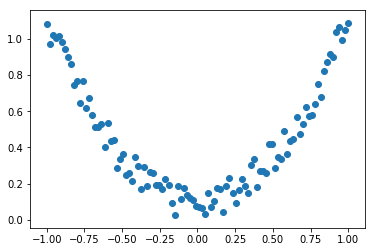

In [2]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
## 添加一个维度
y = x.pow(2) + 0.2 * torch.rand(x.size())
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

- 定义网络结构

In [4]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden,bias = False)
        self.predict = torch.nn.Linear(n_hidden,n_output,bias = False)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        return self.predict(x)

In [6]:
net = Net(1,100,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=100, bias=False)
  (predict): Linear(in_features=100, out_features=1, bias=False)
)


In [11]:
net = Net(n_feature = 1,n_hidden = 100,n_output = 1)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)
loss_func = torch.nn.MSELoss()

loss_list = []
for t in range(200):
    '''
        清空梯度
        计算梯度
        更新参数
    '''
    prediction = net(x)
    loss = loss_func(prediction, y)
    loss_list.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # 将参数更新值施加到net的parameters上面

    if t % 4 == 0:
        plt.cla() # 清空画布
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw = 5)
        plt.text(0.5,0,'loss = %.4f' % loss.data.numpy(),fontdict ={'size':20,'color':'red'})
        plt.pause(0.1)

# plt.plot(range(len(loss_list)),loss_list)
# plt.show()
# plt.ioff()
# plt.show()